# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('diamond_prices.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,14048,0.36,Premium,E,SI2,62.4,58.0,605,4.56,4.54,2.84
1,26619,2.07,Very Good,I,VS2,60.6,58.0,16378,8.24,8.29,5.01
2,14713,0.30,Premium,G,VS1,61.9,59.0,605,4.28,4.32,2.66
3,42532,0.40,Ideal,F,VVS1,61.3,56.0,1323,4.76,4.73,2.91
4,15206,1.01,Ideal,G,VS2,62.4,56.0,6108,6.41,6.37,3.99


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 53940
Number of columns: 11


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,14048,0.36,Premium,E,SI2,62.4,58.0,605,4.56,4.54,2.84
1,26619,2.07,Very Good,I,VS2,60.6,58.0,16378,8.24,8.29,5.01
2,14713,0.30,Premium,G,VS1,61.9,59.0,605,4.28,4.32,2.66
3,42532,0.40,Ideal,F,VVS1,61.3,56.0,1323,4.76,4.73,2.91
4,15206,1.01,Ideal,G,VS2,62.4,56.0,6108,6.41,6.37,3.99


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 10788
Number of columns: 11


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
10788,9050,0.35,Good,E,SI2,64.0,55.0,588,4.49,4.45,2.86
10789,41759,0.43,Ideal,H,IF,62.2,55.0,1245,4.84,4.87,3.02
10790,31011,0.35,Premium,F,SI1,61.7,58.0,748,4.54,4.51,2.79
10791,47505,0.74,Fair,E,I1,58.2,65.0,1865,6.03,5.89,3.47
10792,26138,2.26,Premium,H,SI2,61.3,60.0,15428,8.50,8.43,5.19


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 43152
Number of columns: 11


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 43152
Number of columns: 11


In [12]:
# Drop unnecessary columns
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [16]:
# Rename columns
headers = ["carat", "cut", "color",
           "clarity", "depth (%)", "table", "price", 
           "length (mm)", "width (mm)", "depth (mm)"]
df_train.columns = headers
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth (%)', 'table', 'price',
       'length (mm)', 'width (mm)', 'depth (mm)'],
      dtype='object')

In [17]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 93

Removing duplicates...

Number of duplicated rows: 0


In [18]:
# Show unique values on each X's columns
X = df_train.drop(['price'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

carat
0.30    2094
0.31    1815
1.01    1783
0.70    1552
0.32    1471
        ... 
3.02       1
2.67       1
2.66       1
4.13       1
4.00       1
Name: count, Length: 269, dtype: int64
cut
Ideal        17167
Premium      11060
Very Good     9640
Good          3913
Fair          1279
Name: count, dtype: int64
color
G    9023
E    7793
F    7590
H    6687
D    5392
I    4335
J    2239
Name: count, dtype: int64
clarity
SI1     10435
VS2      9745
SI2      7369
VS1      6485
VVS2     4083
VVS1     2940
IF       1426
I1        576
Name: count, dtype: int64
depth (%)
62.0    1790
61.9    1748
62.2    1653
61.8    1638
62.1    1600
        ... 
79.0       1
52.7       1
54.3       1
69.9       1
69.4       1
Name: count, Length: 176, dtype: int64
table
56.0    7905
57.0    7705
58.0    6711
59.0    5272
55.0    5012
        ... 
63.3       1
61.6       1
73.0       1
61.4       1
61.8       1
Name: count, Length: 120, dtype: int64
length (mm)
4.37     361
4.34     352
4.32     343
4.38    

In [19]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [20]:
# # Remove X's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# X = df_train.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [21]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43059 entries, 0 to 43058
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        43059 non-null  float64
 1   cut          43059 non-null  object 
 2   color        43059 non-null  object 
 3   clarity      43059 non-null  object 
 4   depth (%)    43059 non-null  float64
 5   table        43059 non-null  float64
 6   price        43059 non-null  int64  
 7   length (mm)  43059 non-null  float64
 8   width (mm)   43059 non-null  float64
 9   depth (mm)   43059 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [22]:
# # Change the data type of X's invalid columns
# df_train["Target class"] = df_train["Target class"].astype("int64")
# df_train.info()

In [23]:
# Show unique values on y's column
y = df_train['price']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 43059

price
776      108
625      104
802      102
605      101
698      100
        ... 
9246       1
16223      1
11924      1
5762       1
1903       1
Name: count, Length: 10730, dtype: int64


In [24]:
# # Remove y's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# y = df_train['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [25]:
# # Change the data type of y's invalid column
# df_train["Bare Nuclei"] = df_train["Bare Nuclei"].astype("int64")
# df_train.info()

In [26]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
['clarity', 'color', 'cut']


In [27]:
# Show unique values in categorical columns
unique_values = []

for col in categorical_cols:
    unique_value = [col]
    unique_value.append(", ".join(df_train[col].unique()))
    unique_values.append(unique_value)

pd.DataFrame(unique_values, columns=["col", "unique values"])

,col,unique values
0,cut,"Good, Ideal, Premium, Fair, Very Good"
1,color,"E, H, F, I, G, D, J"
2,clarity,"SI2, IF, SI1, I1, VS2, VS1, VVS1, VVS2"


In [28]:
# Encode categorical columns using OrdinalEncoder

enc_maps = {
    "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
    "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
    "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
}

for col in categorical_cols:
    enc_map = enc_maps[col]

    enc = OrdinalEncoder(mapping=enc_map)
    df_train = enc.fit_transform(df_train)


df_train

,carat,cut,color,clarity,depth (%),table,price,length (mm),width (mm),depth (mm)
0,0.35,1,1,7.0,64.0,55.0,588,4.49,4.45,2.86
1,0.43,4,4,1.0,62.2,55.0,1245,4.84,4.87,3.02
2,0.35,3,2,6.0,61.7,58.0,748,4.54,4.51,2.79
3,0.74,0,1,-1.0,58.2,65.0,1865,6.03,5.89,3.47
4,2.26,3,4,7.0,61.3,60.0,15428,8.50,8.43,5.19
...,...,...,...,...,...,...,...,...,...,...
43054,0.42,1,2,6.0,63.6,57.0,722,4.70,4.76,3.01
43055,0.35,2,0,6.0,60.1,61.0,644,4.56,4.59,2.75
43056,1.26,3,6,6.0,61.7,58.0,5114,6.91,6.99,4.29
43057,0.50,1,1,6.0,63.2,57.0,1316,5.03,5.06,3.19


<Axes: >

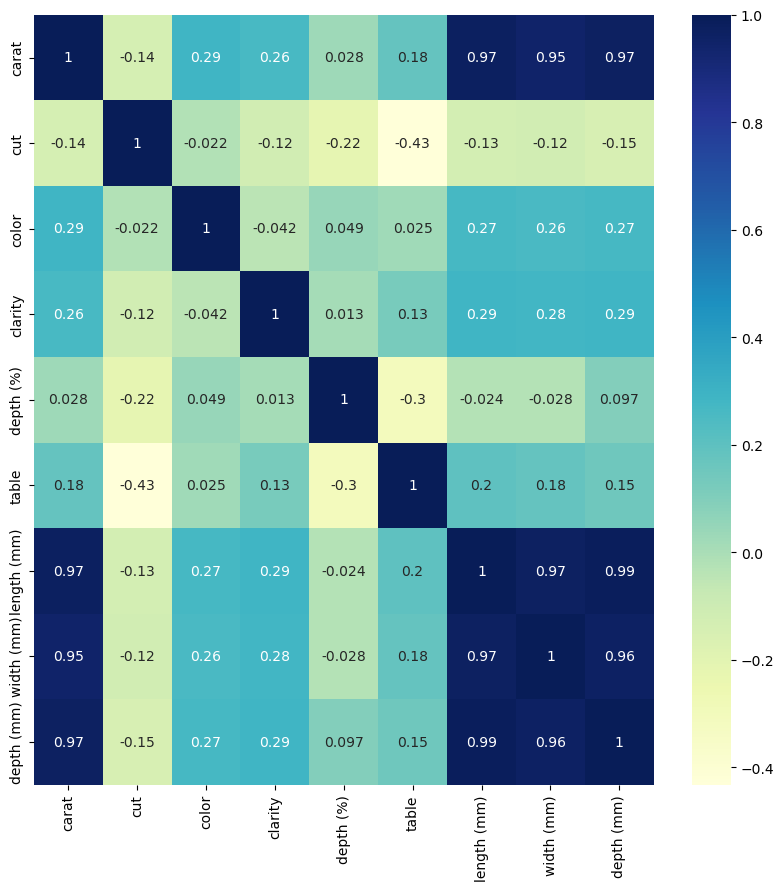

In [29]:
# Displaying heatmap
X = df_train.drop(['price'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [30]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

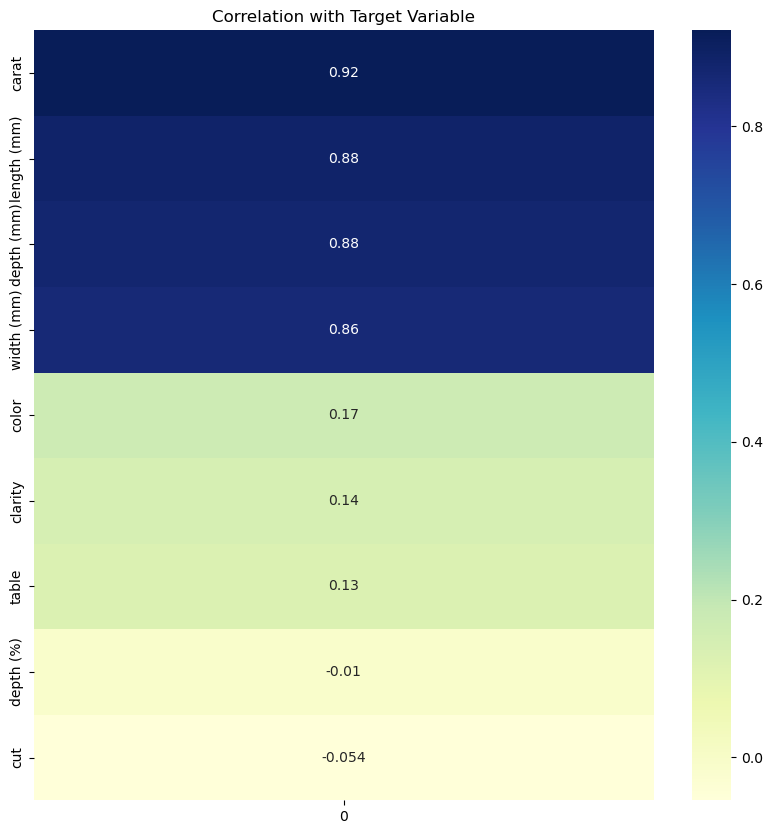

In [31]:
# Create a correlation matrix with target variable
X = df_train.drop(['price'], axis=1)
y = df_train['price']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [32]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [33]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth (%)',
 'table',
 'price',
 'length (mm)',
 'width (mm)',
 'depth (mm)']

In [34]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

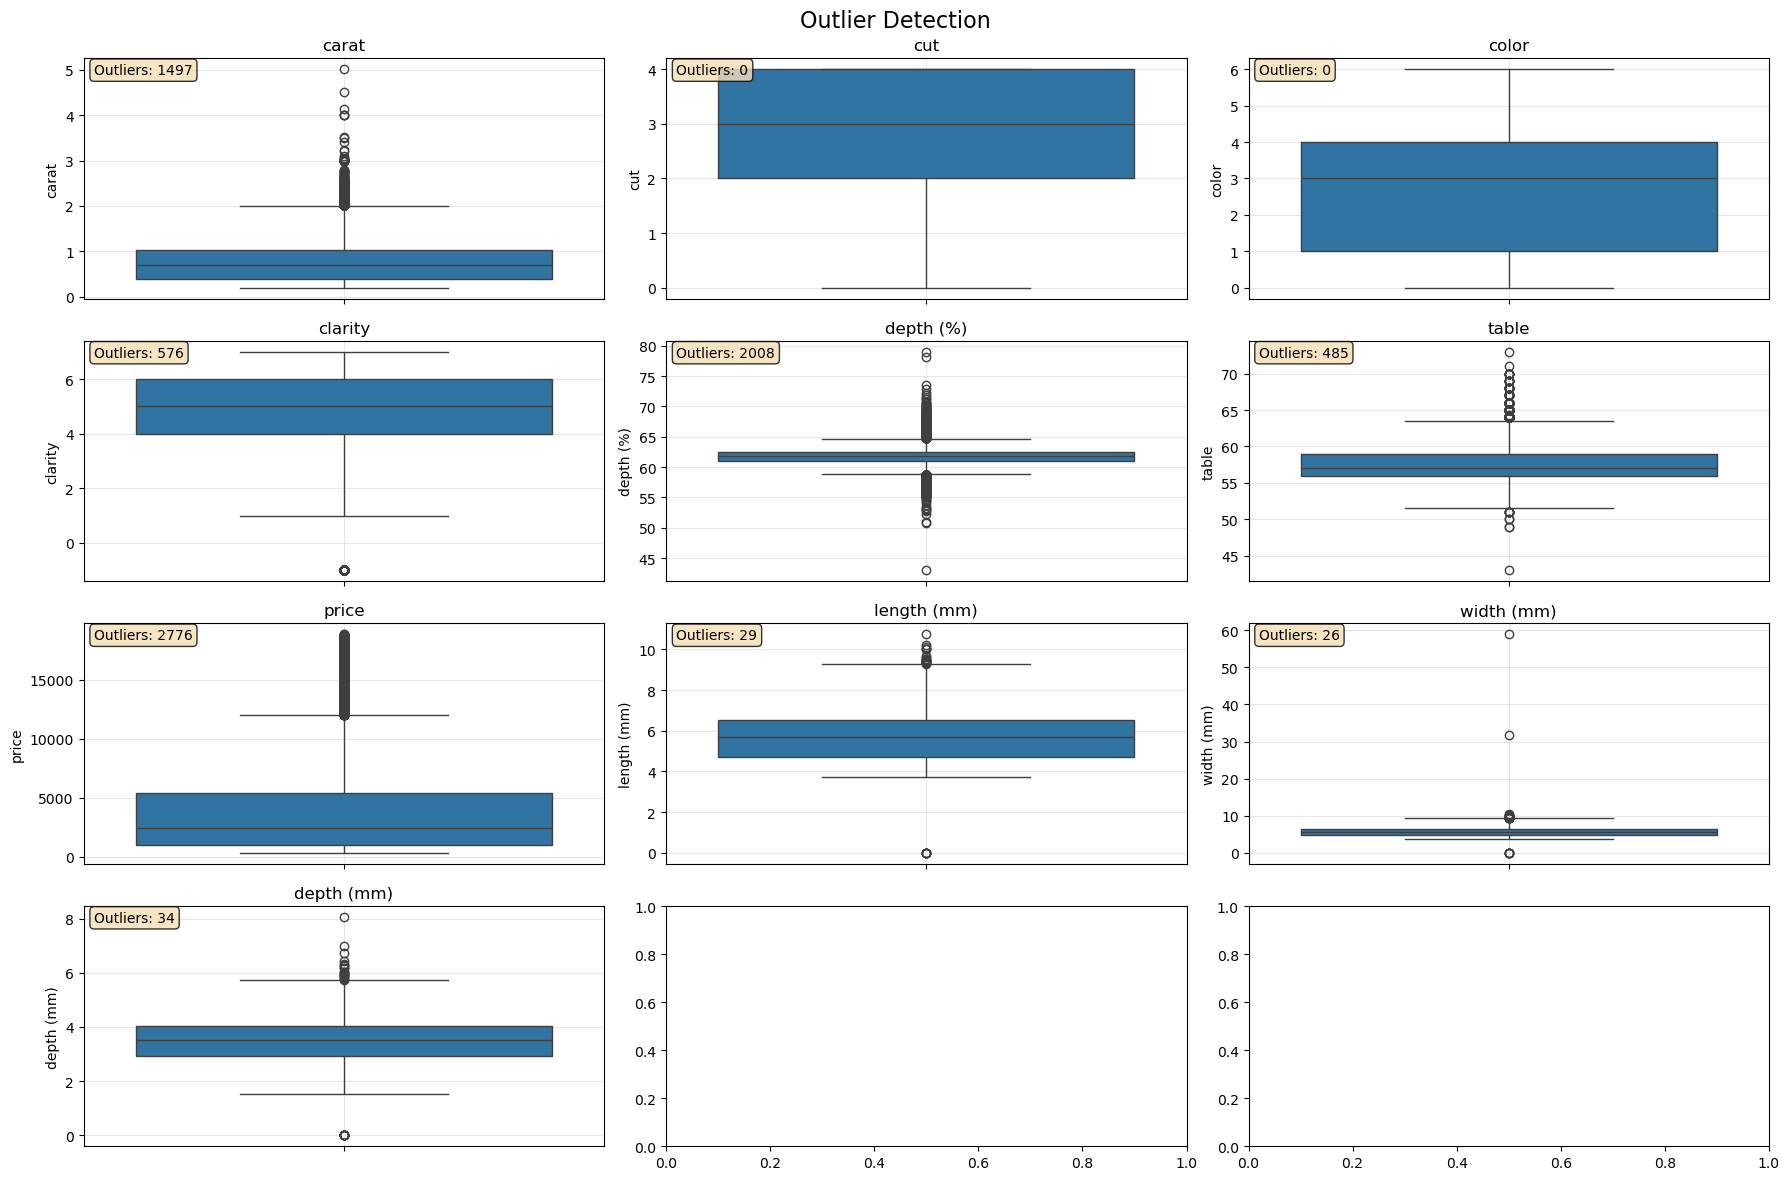

In [35]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [36]:
# Remove outliers based on IQR method (only if the dataset is big enough)
for i, col in enumerate(numerical_columns):
    
    df_train = df_train[df_train[col] >= lower_bounds[col]]
    df_train = df_train.reset_index(drop=True)
    df_train = df_train[df_train[col] <= upper_bounds[col]]
    df_train = df_train.reset_index(drop=True)

In [37]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 37647
Number of columns: 10


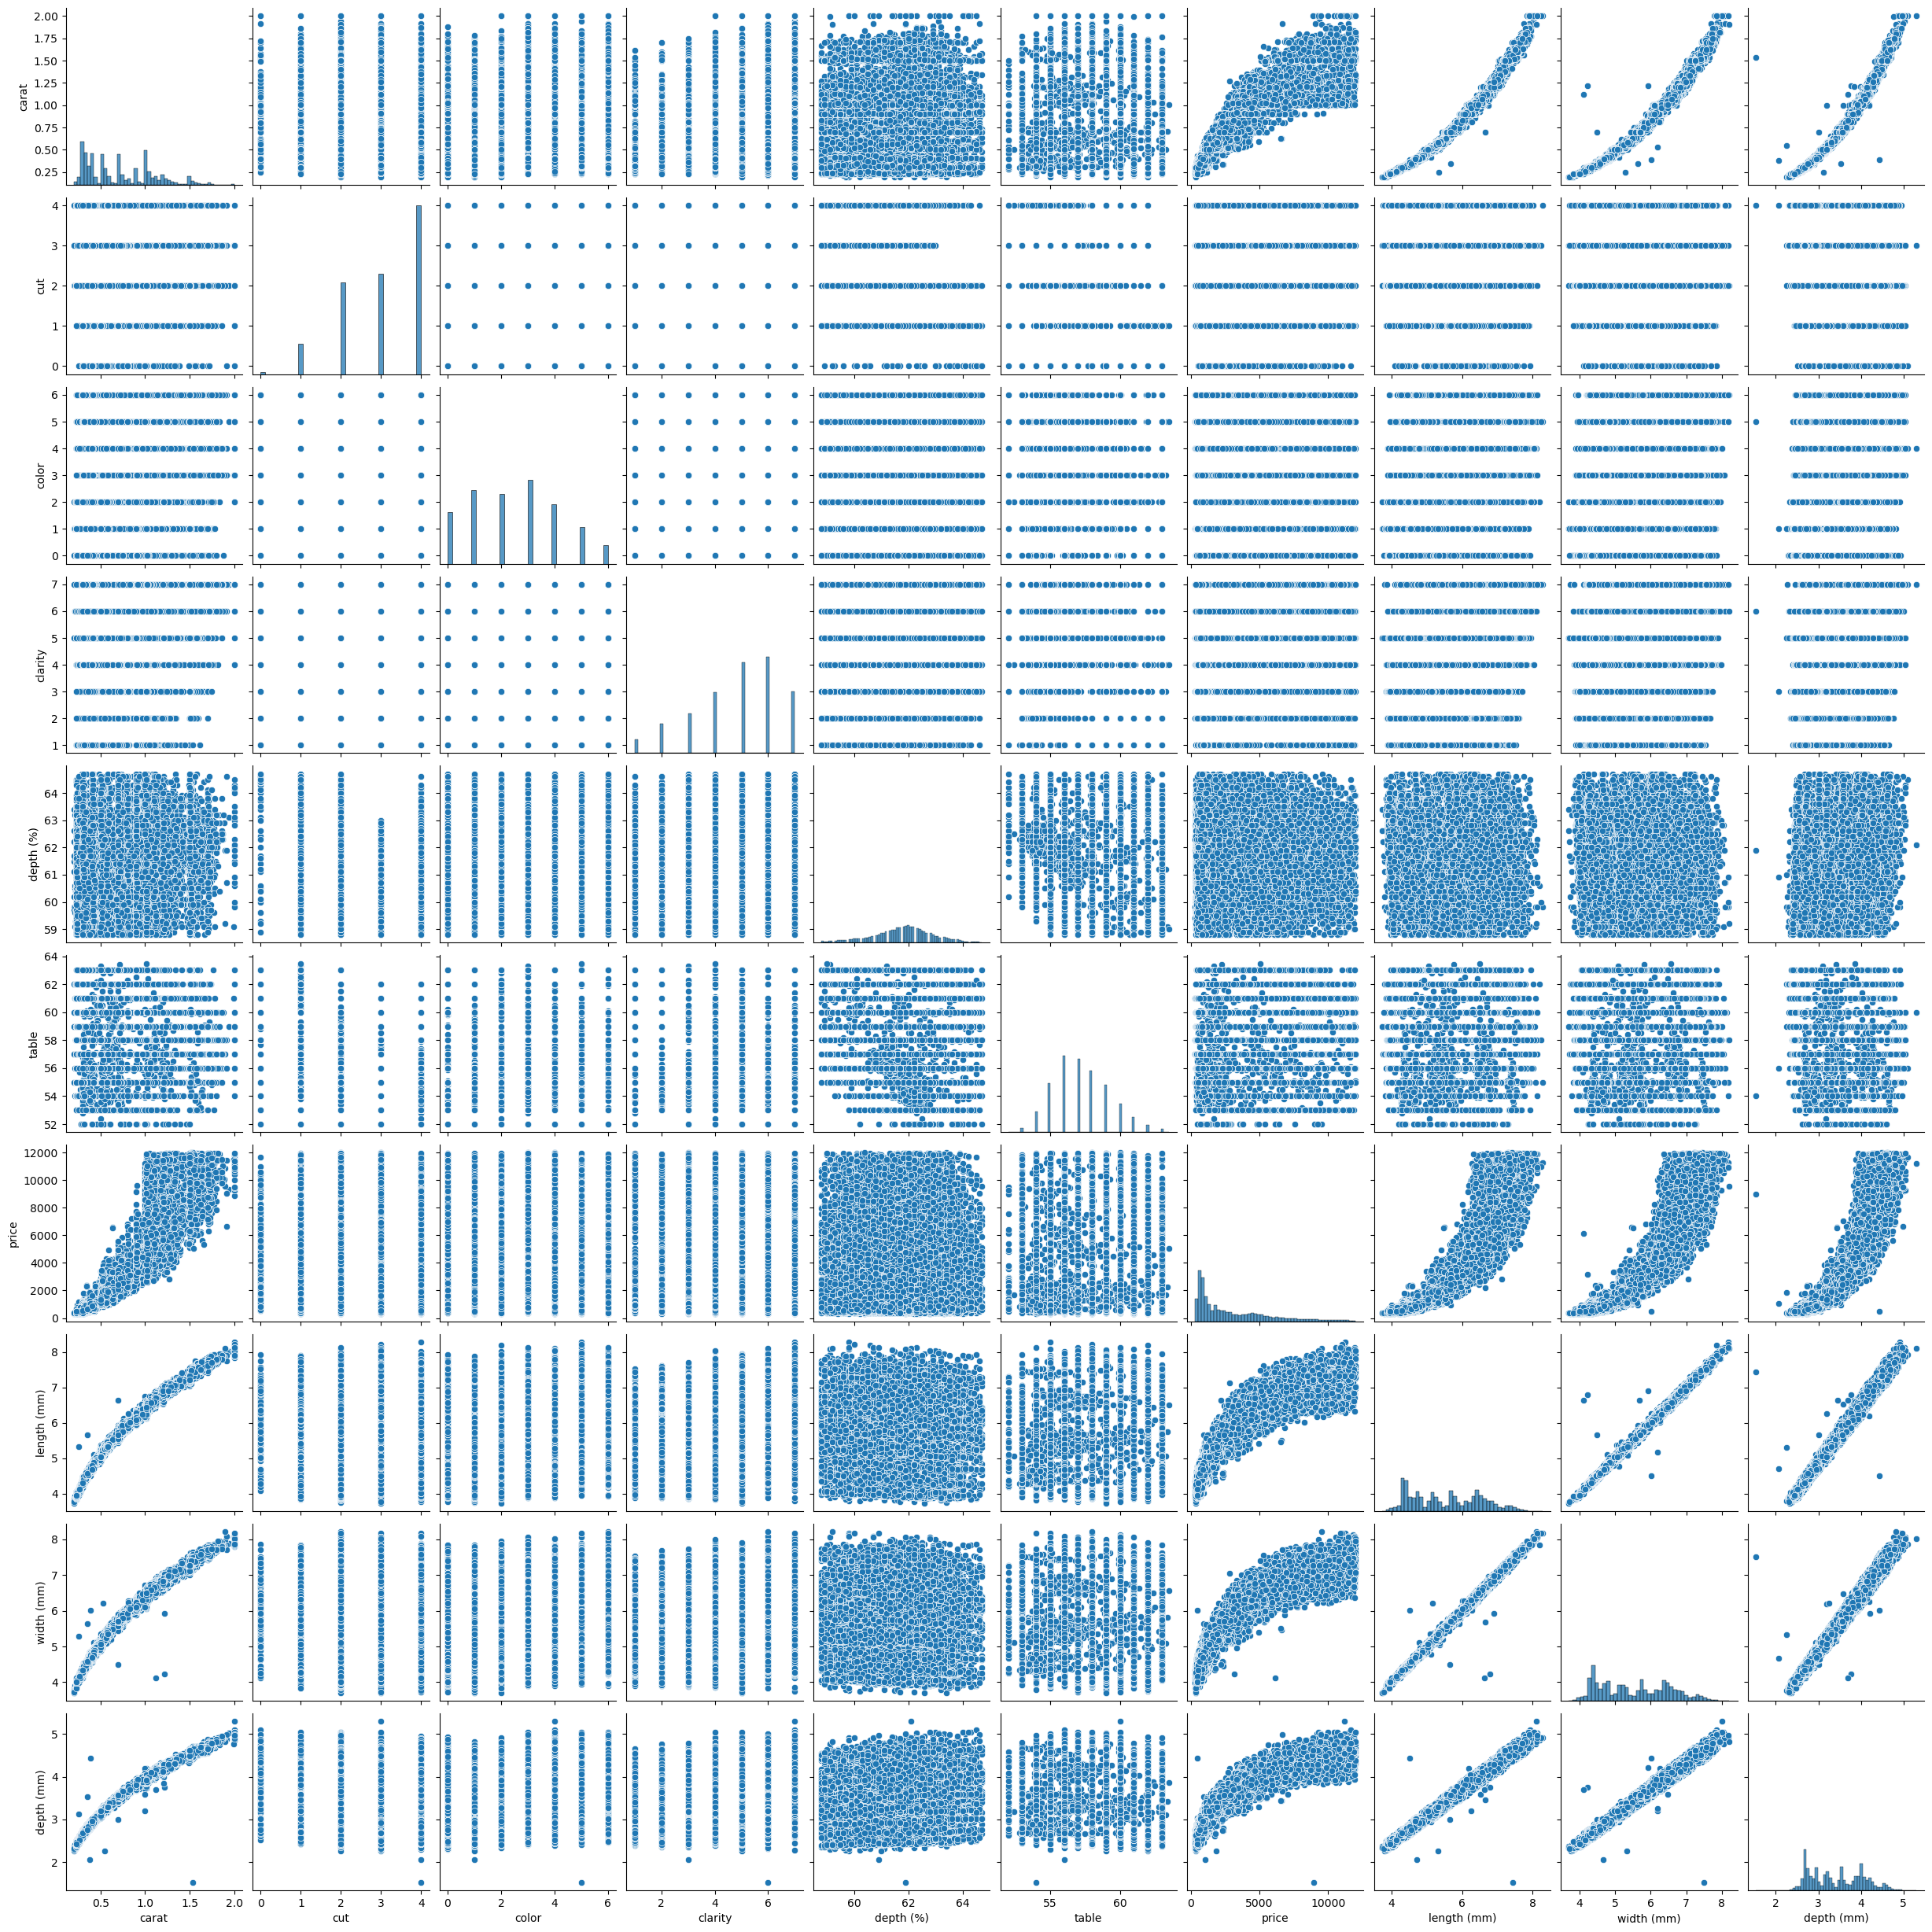

In [38]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [39]:
# Show statistical information of the dataset
df_train.describe()

,carat,cut,color,clarity,depth (%),table,price,length (mm),width (mm),depth (mm)
count,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000,37647.000000
mean,0.707141,3.021648,2.538396,4.841581,61.787213,57.254198,3128.832098,5.542220,5.547363,3.425792
std,0.370721,1.013107,1.684076,1.624430,1.100500,2.019355,2777.432951,0.979969,0.974146,0.606274
min,0.200000,0.000000,0.000000,1.000000,58.800000,52.000000,326.000000,3.730000,3.710000,1.530000
25%,0.370000,2.000000,1.000000,4.000000,61.100000,56.000000,886.000000,4.630000,4.640000,2.850000
50%,0.600000,3.000000,3.000000,5.000000,61.900000,57.000000,2052.000000,5.430000,5.440000,3.350000
75%,1.010000,4.000000,4.000000,6.000000,62.500000,59.000000,4672.000000,6.410000,6.410000,3.970000
max,2.000000,4.000000,6.000000,7.000000,64.700000,63.500000,11986.000000,8.280000,8.210000,5.300000


In [40]:
# Separate features and labels
y_train = df_train['price']
X_train = df_train.drop(['price'], axis=1)

In [41]:
# MinMax Scaling
numeric_cols = X_train.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_train, columns=['price'])

,price
0,0.022470
1,0.078816
2,0.036192
3,0.721012
4,0.146484
...,...
37642,0.033962
37643,0.027273
37644,0.410635
37645,0.084906


### 3.2 Testing Data

In [42]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 10788
Number of columns: 11


In [43]:
# Drop unnecessary columns
df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [44]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [45]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   price    10788 non-null  int64  
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [46]:
# Rename columns
headers = ["carat", "cut", "color",
           "clarity", "depth (%)", "table", "price", 
           "length (mm)", "width (mm)", "depth (mm)"]
df_test.columns = headers
df_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth (%)', 'table', 'price',
       'length (mm)', 'width (mm)', 'depth (mm)'],
      dtype='object')

In [47]:
# # Drop poor features (to avoid overfitting)
# df_test = df_test.drop(['VendorID'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['payment_type'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [48]:
# # Remove X's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# X = df_test.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [49]:
# # Change the data type of X's invalid columns
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [50]:
# # Remove y's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# y = df_test['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [51]:
# # Change the data type of y's invalid column
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [52]:
# Encode categorical columns using OrdinalEncoder
categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

enc_maps = {
    "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
    "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
    "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
}

for col in categorical_cols:
    enc_map = enc_maps[col]

    enc = OrdinalEncoder(mapping=enc_map)
    df_test = enc.fit_transform(df_test)


df_test

,carat,cut,color,clarity,depth (%),table,price,length (mm),width (mm),depth (mm)
0,0.36,3,1,7.0,62.4,58.0,605,4.56,4.54,2.84
1,2.07,2,5,5.0,60.6,58.0,16378,8.24,8.29,5.01
2,0.30,3,3,4.0,61.9,59.0,605,4.28,4.32,2.66
3,0.40,4,2,2.0,61.3,56.0,1323,4.76,4.73,2.91
4,1.01,4,3,5.0,62.4,56.0,6108,6.41,6.37,3.99
...,...,...,...,...,...,...,...,...,...,...
10783,1.45,0,2,7.0,64.4,58.0,6455,7.17,7.11,4.59
10784,2.00,0,6,-1.0,66.5,56.0,6796,7.93,7.80,5.23
10785,0.46,2,3,2.0,61.7,60.0,1413,4.94,4.98,3.06
10786,0.78,4,2,4.0,61.6,56.0,3537,5.90,5.92,3.64


In [53]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [54]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [55]:
# Separate features and labels
X_test = df_train.drop(['price'], axis=1)
y_test = df_train['price']

In [56]:
# MinMax Scaling
numeric_cols = X_test.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])
y_test = scaler_Y.fit_transform(y_test.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_test, columns=['price'])

,price
0,0.022470
1,0.078816
2,0.036192
3,0.721012
4,0.146484
...,...
37642,0.033962
37643,0.027273
37644,0.410635
37645,0.084906


# 4. KNN-R

In [57]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("KNN Regression")
evaluate_model(model, X_test, y_test)

KNN Regression
MAE: 218.83857943528037
MSE: 138449.0696714213
RMSE: 372.0874489571253
R^2: 0.9820520681929731


In [60]:
residual_df

,Y_Test,Y_Pred,Residuals
0,588.0,552.2,35.8
1,1245.0,1237.8,7.2
2,748.0,785.0,-37.0
3,8733.0,9549.0,-816.0
4,2034.0,1764.0,270.0


# 5. Tuning

In [61]:
base_model = KNeighborsRegressor()

params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "r2")

In [62]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
CPU times: total: 703 ms
Wall time: 7.33 s


,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [63]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,0.063865,0.007446,0.447539,0.013923,8,{'n_neighbors': 8},0.973180,0.971214,0.972338,0.972517,0.972312,0.000708,1
9,0.057636,0.004699,0.493628,0.020789,10,{'n_neighbors': 10},0.973011,0.971466,0.972054,0.972618,0.972287,0.000583,2
10,0.062750,0.003701,0.598670,0.016075,15,{'n_neighbors': 15},0.973379,0.971483,0.971591,0.972582,0.972259,0.000776,3
8,0.059119,0.005138,0.471939,0.011676,9,{'n_neighbors': 9},0.973059,0.971139,0.972319,0.972483,0.972250,0.000698,4
6,0.067168,0.006411,0.425483,0.009512,7,{'n_neighbors': 7},0.973199,0.970982,0.972368,0.972237,0.972197,0.000792,5


In [64]:
best_params = grid_search.best_estimator_
best_params

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
# Evaluate the best model
evaluate_model(best_params, X_test, y_test)

MAE: 233.86243259755094
MSE: 156418.47977013438
RMSE: 395.49776202923624
R^2: 0.9797225924671367


# 6. Testing Model (if test dataset exists)